# Titanic dataset

Data Dictionary ([source](https://www.kaggle.com/c/titanic/data))

|Variable |	Definition | Key |
|:------------ |:----------------| -------|
|survival  |Survival 	|0 = No, 1 = Yes|
|pclass 	|Ticket class |	1 = 1st, 2 = 2nd, 3 = 3rd
||| *This can be seen as a proxy for socio-economic status*|
|sex 	|Sex 	||
|age 	|Age in years 	|Age is fractional if less than 1.
|||*If the age is estimated, it is in the form xx.5*|
|sibsp |	# of siblings / spouses aboard the Titanic 	|The dataset defines family relations in this way:
|||**Sibling** = brother, sister, stepbrother, stepsister|
|||**Spouse** = husband, wife
|||*Mistresses and fiancés were ignored*|
|parch |	# of parents / children aboard the Titanic 	|The dataset defines family relations in this way:
|||**Parent** = mother, father
|||**Child** = daughter, son, stepdaughter, stepson
|||*Some children travelled only with a nanny, therefore parch=0 for them.*|
|ticket |	Ticket number 	||
|fare 	|Passenger fare 	||
|cabin | Cabin number 	||
|embarked 	|Port of Embarkation |	C = Cherbourg, Q = Queenstown, S = Southampton |

## Load libraries

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

## Load dataset

In [0]:
url = 'http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.xls'
df = pd.read_excel(url)

# drop columns that are not part of the classic (v1/v2) dataset
df.drop(['boat', 'body', 'home.dest'], axis=1, inplace=True)

# preview 5 first elements of df
df.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C


## Basic Dataset investigation

In [0]:
print("Shape of dataset:")
print(df.shape)

Shape of dataset:
(1309, 11)


In [0]:
print("Descriptive statistics:")
df.describe(include='all')

Descriptive statistics:


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
count,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307
unique,NaN,NaN,1307,2,NaN,NaN,NaN,939,NaN,186,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914
mean,2.294882,0.381971,NaN,NaN,29.881135,0.498854,0.385027,NaN,33.295479,NaN,NaN
std,0.837836,0.486055,NaN,NaN,14.413500,1.041658,0.865560,NaN,51.758668,NaN,NaN
min,1.000000,0.000000,NaN,NaN,0.166700,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,2.000000,0.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,3.000000,0.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,3.000000,1.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


From the desriptive statistics presented above, we observe that for most passengers there is no cabin inofmation available. 
For this reason, we drop this observation from the dataset.

In [0]:
# drop cabin from df, as info not available for most passengers.
df.drop('cabin', axis=1, inplace=True)

In [0]:
# Remove NaN values
df.dropna(inplace=True) 

In [0]:
print("New hape of dataset:")
print(df.shape)

New hape of dataset:
(1043, 10)


## Exploratory data analysis

We observe that survival rate correlates with ticket class.

In [0]:
df.groupby('pclass').sum()['survived']/df.groupby('pclass').size()

pclass
1    0.634752
2    0.440613
3    0.262000
dtype: float64

Additionally, female passengers exhibit a significantly higher survival rate than males (75% vs 20%)

In [0]:
df.groupby('sex').sum()['survived']/df.groupby('sex').size()

sex
female    0.751295
male      0.205479
dtype: float64

In [0]:
df.groupby('embarked').sum()['survived']/df.groupby('embarked').size()

embarked
C    0.622642
Q    0.260000
S    0.358515
dtype: float64

In [0]:
survivals_crosstab = pd.crosstab(df[df['survived']==1]['embarked'],[df[df['survived']==1]['sex'], df[df['survived']==1]['pclass']], margins=True)
all_crosstab = pd.crosstab(df['embarked'],[df['sex'], df['pclass']], margins=True)
fatalities_crosstab = all_crosstab - survivals_crosstab
survprob_crosstab = survivals_crosstab/all_crosstab

survprob_crosstab

sex         female                          male                           All
pclass           1         2         3         1         2         3          
embarked                                                                      
C         0.969231  1.000000  0.772727  0.412698  0.307692  0.289474  0.622642
Q         1.000000  1.000000  0.380952  0.000000  0.000000  0.095238  0.260000
S         0.953125  0.879121  0.431193  0.310345  0.134752  0.159170  0.358515
All       0.961832  0.893204  0.473684  0.350993  0.145570  0.169540  0.407478

## Feature engineering

Inspired from https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/

### Get titles

In [0]:
df['title'] = df['name'].apply(lambda st: st[st.find(", ")+1:st.find(".")])
df.drop('name', axis=1, inplace=True)

In [0]:
df.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,embarked,title
0,1,1,female,29.0000,0,0,24160,211.3375,S,Miss
1,1,1,male,0.9167,1,2,113781,151.5500,S,Master
2,1,0,female,2.0000,1,2,113781,151.5500,S,Miss
3,1,0,male,30.0000,1,2,113781,151.5500,S,Mr
4,1,0,female,25.0000,1,2,113781,151.5500,S,Mrs


In [0]:
pd.crosstab(df['survived'], df['title'])

title,Capt,Col,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
survived,,,,,,,,,,,,,,,,,,
0,1,2,1,0,3,1,0,1,25,64,0,0,480,32,0,8,0,0
1,0,2,0,1,4,0,1,1,28,145,2,1,100,137,1,0,1,1


### Family size

In [0]:
df['fam_size'] = df['sibsp'] + df['parch']
df.drop(['sibsp', 'parch'], axis=1, inplace=True)

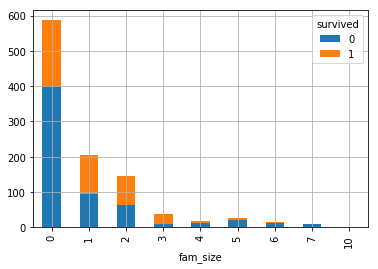

In [0]:
pd.crosstab(df['fam_size'], df['survived']).plot.bar(stacked=True)
plt.grid()
plt.show()

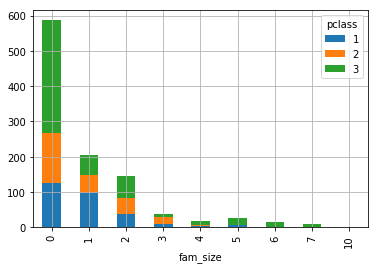

In [0]:
pd.crosstab(df['fam_size'], df['pclass']).plot.bar(stacked=True)
plt.grid()
plt.show()